In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

In [189]:
df = pd.read_csv('imdb_top_1000.csv')
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [190]:
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [191]:
## Eliminar valores nulos

print("Número de registros antes de eliminar valores nulos: ", len(df))
df = df.dropna(subset=['Certificate', 'Gross', 'Meta_score'], axis=0) #Borro los registros que contengan valores nulos en las columnas especificadas
print("Número de registros despues de eliminar valores nulos: ", len(df))
#df = df.dropna(axis=1) #Borro las columnas que contengan valores nulos, en este caso seria equivalente a la sigueinte linea de código
#df = df.drop('Meta_score', axis=1)

Número de registros antes de eliminar valores nulos:  1000
Número de registros despues de eliminar valores nulos:  714


In [192]:
df.isnull().sum()

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

In [160]:
df['Released_Year'] = df['Released_Year'].astype(int)

ValueError: invalid literal for int() with base 10: 'PG'

In [193]:
#df['Released_Year'].to_csv('valores_released_year.txt', header=None, index=None, sep=' ')
df[df['Released_Year'] == 'PG'] #Vemos que una columna tiene un valor erroneo, lo que causo el error anterior, lo corregire manualmente

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,https://m.media-amazon.com/images/M/MV5BNjEzYj...,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


In [194]:
df.loc[df['Released_Year'] == 'PG', 'Released_Year'] = 1995 #Corregimos el valor erroneo
df[df['Series_Title'] == 'Apollo 13']

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,https://m.media-amazon.com/images/M/MV5BNjEzYj...,Apollo 13,1995,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


In [195]:
df['Released_Year'] = df['Released_Year'].astype(int)
df['Runtime'] = df['Runtime'].str.replace('min', '').astype(int)
df['Gross'] = df['Gross'].str.replace(',', '').astype(float)

In [196]:
df.dtypes

Poster_Link       object
Series_Title      object
Released_Year      int64
Certificate       object
Runtime            int64
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
dtype: object

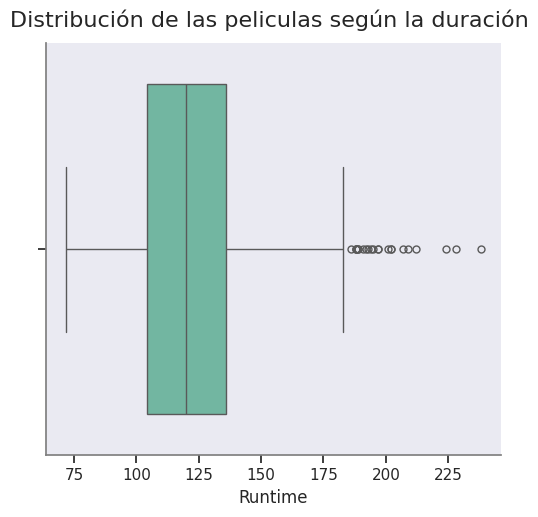

In [206]:
sns.set(style="ticks")  # Estilo de los ejes
plt.rcParams["axes.facecolor"] = "#EAEAF2" 
plt.rcParams["axes.edgecolor"] = "gray"
custom_palette = sns.color_palette("Set2")  # Paleta de colores
sns.set_palette(custom_palette)
sns.catplot(data=df, x='Runtime',kind="box")
plt.suptitle("Distribución de las peliculas según la duración", y=1.03, fontsize=16)
plt.show()

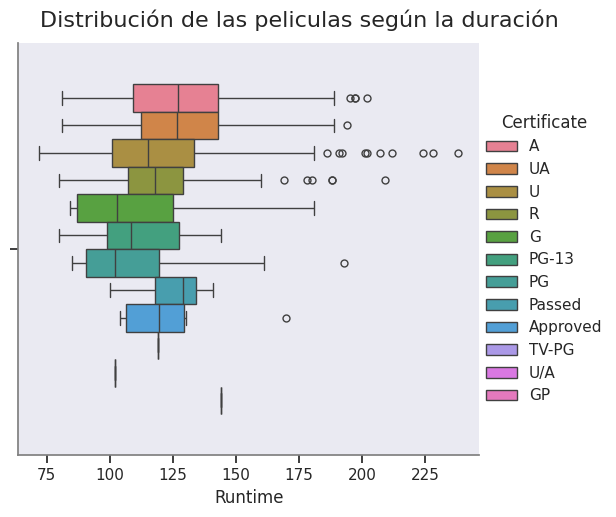

In [209]:
sns.catplot(data=df, x='Runtime',kind="box",hue='Certificate')
plt.suptitle("Distribución de las peliculas según la duración", y=1.03, fontsize=16)
plt.show()

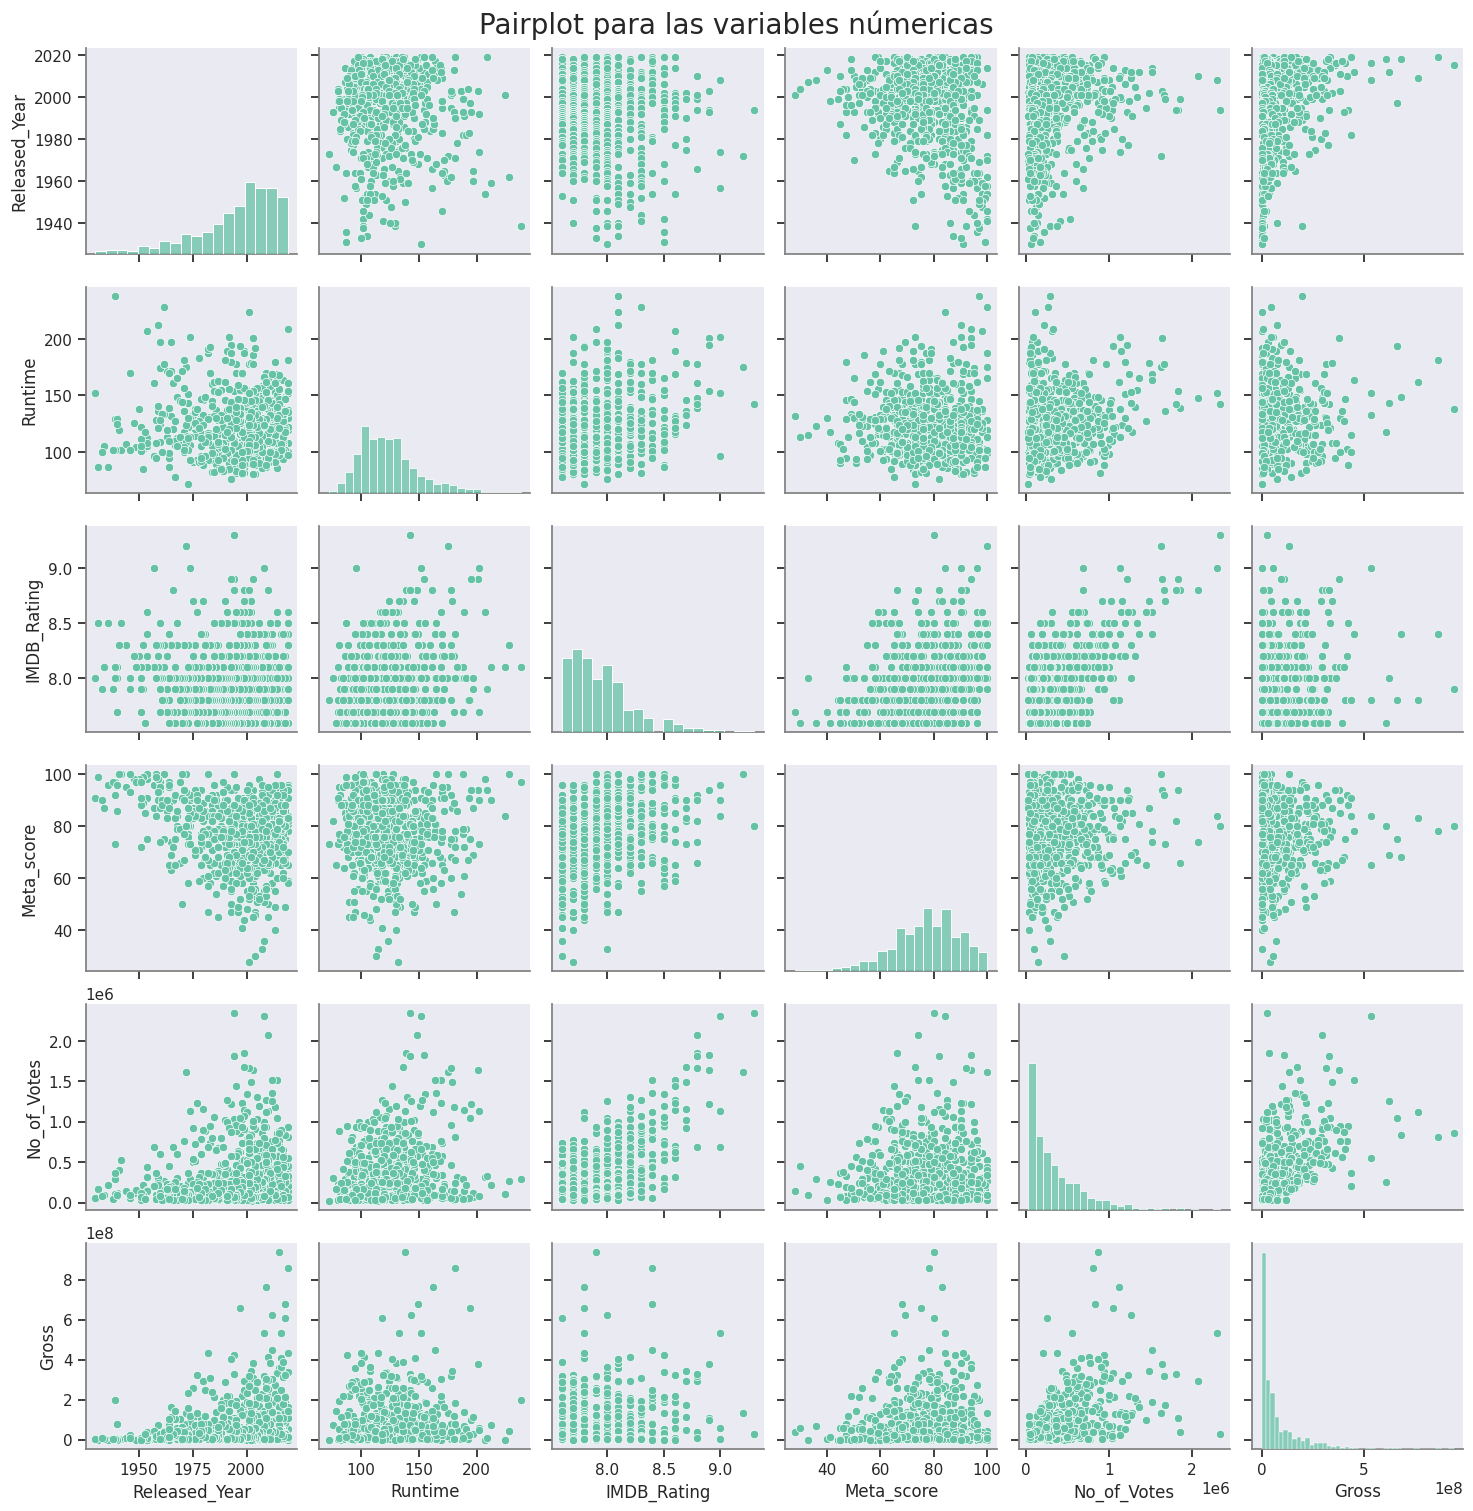

In [201]:
sns.pairplot(df)
plt.suptitle("Pairplot para las variables númericas", y=1.01, fontsize=20)
plt.show()

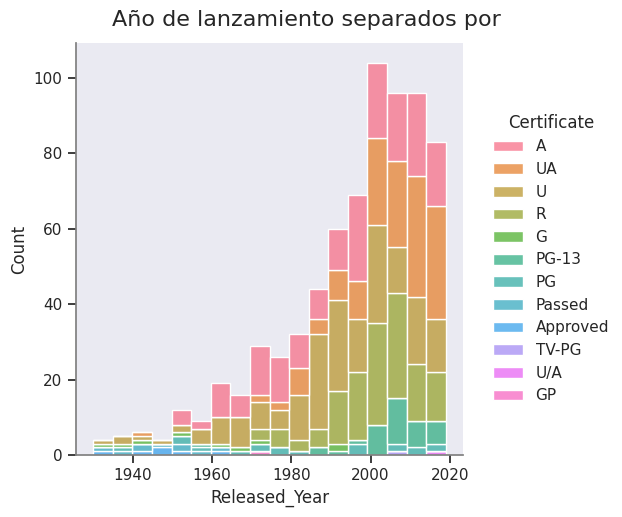

In [203]:
sns.displot(data= df, x=df['Released_Year'],hue=df['Certificate'], multiple='stack')
plt.suptitle("Año de lanzamiento separados por", y=1.03, fontsize=16)
plt.show()

<Axes: xlabel='Gross', ylabel='No_of_Votes'>

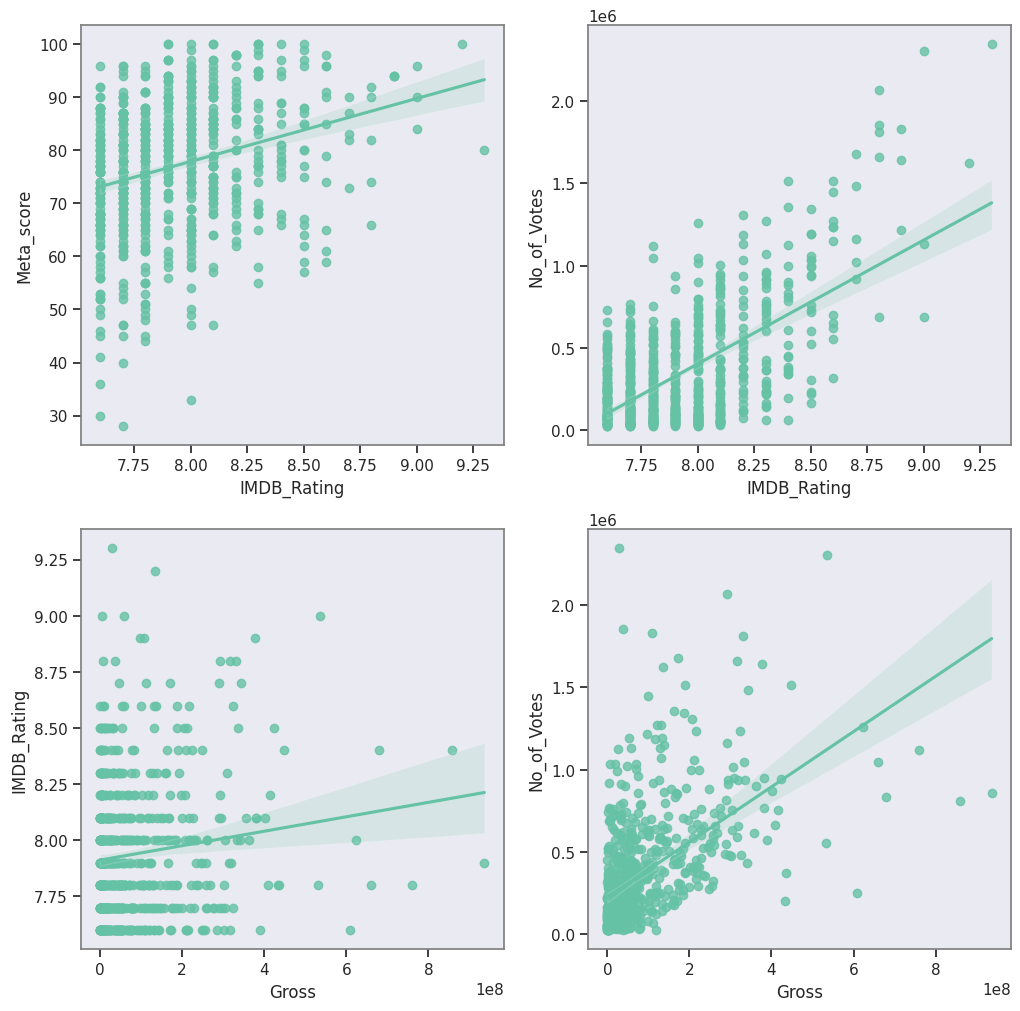

In [197]:
fig,axes = plt.subplots(2,2, figsize=(12,12))
sns.regplot(ax =axes[0,0],data=df, x=df['IMDB_Rating'], y=df['Meta_score'])
sns.regplot(ax =axes[0,1],data=df, x=df['IMDB_Rating'], y=df['No_of_Votes'])
sns.regplot(ax =axes[1,0],data=df, x=df['Gross'], y=df['IMDB_Rating'])
sns.regplot(ax =axes[1,1],data=df, x=df['Gross'], y=df['No_of_Votes'])
